In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/down_data.csv")
data.shape

(61, 3)

In [7]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(60):
    x1.append(x[i]*0.1) # 2차함수 0.1(down)
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001(down)
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [8]:
hypothesis=B+X1*W1+X2*W2
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000005) # 2차 함수 :0.000000005(down)
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
for step in range(35000): # 35000번
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1,X2:x2, Y:y1})
    if step % 5000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  4968355.0 
Prediction:
 [-5008.856    -4780.0947   -4598.4824   -4458.789    -4323.847
 -4193.468    -3827.8909   -3886.2803   -3799.0608   -3658.4539
 -3471.133    -3197.6042   -3221.4749   -3081.089    -2904.073
 -2819.6917   -2639.233    -2507.3582   -2365.0906   -2215.0745
 -2090.0156   -1957.972    -1861.1877   -1706.3994   -1622.1476
 -1498.0438   -1393.3741   -1314.8112   -1249.6089   -1144.9883
 -1056.446     -967.2103    -885.00836   -797.21686   -717.3581
  -649.6499    -583.046     -518.28357   -459.70477   -400.05182
  -349.79358   -296.7439    -252.42538   -215.30826   -182.33047
  -156.34592   -142.0436    -140.51166   -135.98114   -133.01523
  -131.54909   -131.54909   -130.09338   -130.09338   -128.64806
  -128.64806   -125.789406  -127.21308   -127.21308   -127.21308 ] 
W1:[-0.30697086],B:[1.8832272]
5000 Cost:  31.109428 
Prediction:
 [16.76635    15.104153   13.803593   12.815392   11.871365   10.969574
  8.499317    8.887775    8.308407    7.386093    6.181

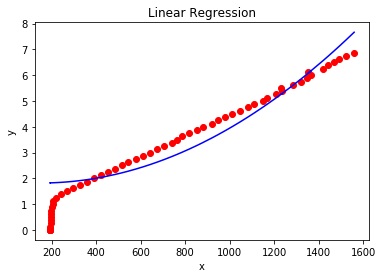

In [10]:
# W1:[0.00108227],B:[1.1958917]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x1,y1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x1,sess.run(B)+x1*sess.run(W1)+x2*sess.run(W2), 'b')
# X=5 일때의 계산 값
plt.show()